In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("heart_disease_dataset.csv")

In [4]:
df

,age,sex,chest_pain_type,resting bp,serun_cholestrol,fasting_blood_sugar,restecg,maximum heart rate,ex_angina,ST_dep,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


### Data visualization

<AxesSubplot:xlabel='thal', ylabel='target'>

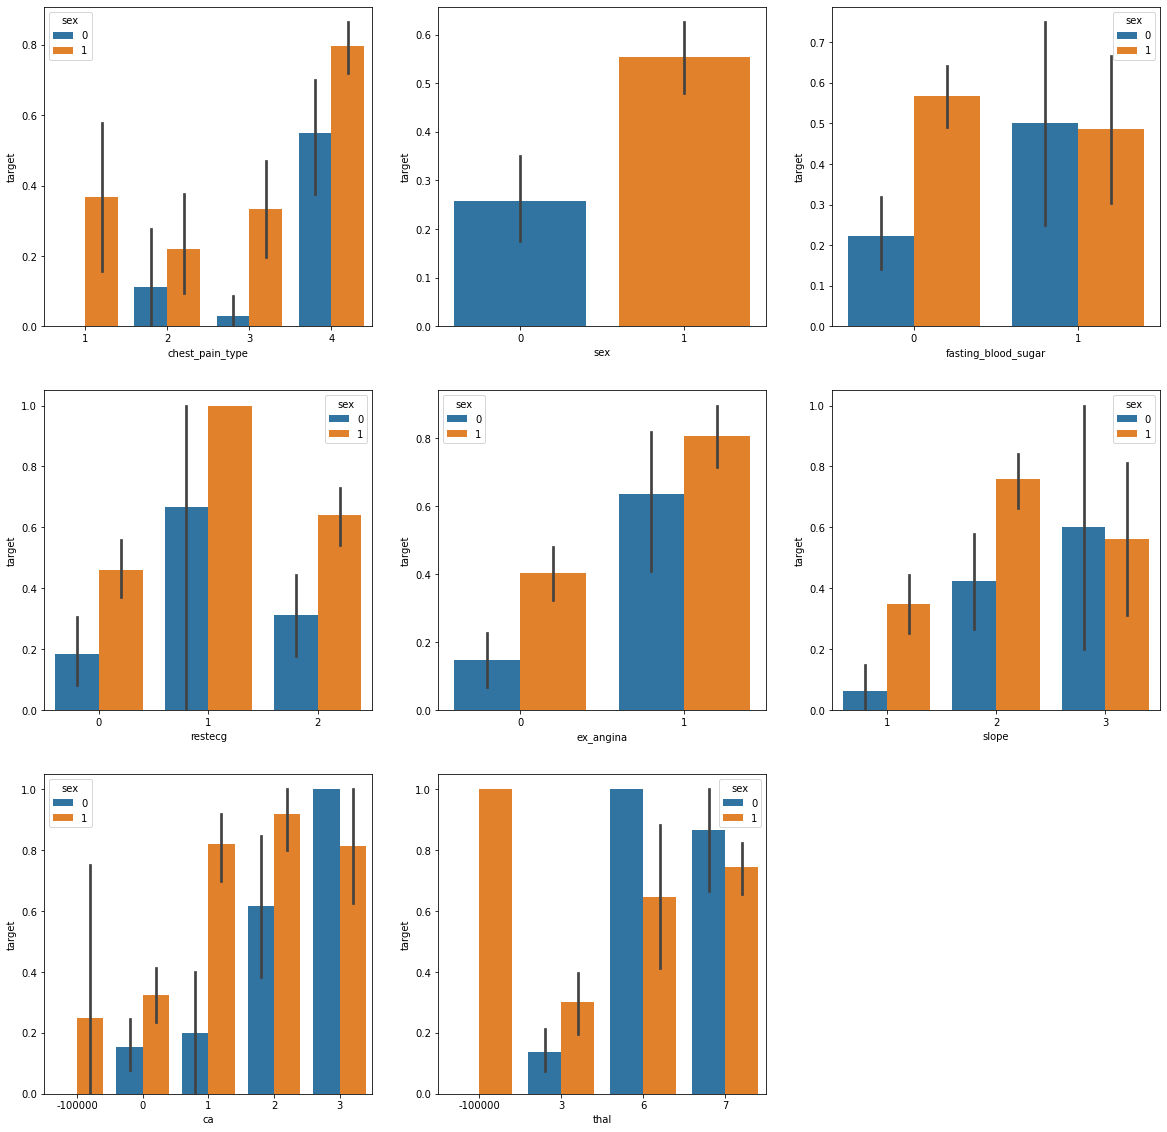

In [153]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.barplot("chest_pain_type","target",data=df,hue="sex")
plt.subplot(3,3,2)
sns.barplot("sex","target",data=df)
plt.subplot(3,3,3)
sns.barplot("fasting_blood_sugar","target",data=df,hue="sex")
plt.subplot(3,3,4)
sns.barplot("restecg","target",data=df,hue="sex")
plt.subplot(3,3,5)
sns.barplot("ex_angina","target",data=df,hue="sex")
plt.subplot(3,3,6)
sns.barplot("slope","target",data=df,hue="sex")
plt.subplot(3,3,7)
sns.barplot("ca","target",data=df,hue="sex")
plt.subplot(3,3,8)
sns.barplot("thal","target",data=df,hue="sex")

### Male have heigher chances to have heart disease because male have all value high like chances of chest pain, ex_angina 

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'chest_pain_type'}>,
        <AxesSubplot:title={'center':'resting bp'}>],
       [<AxesSubplot:title={'center':'serun_cholestrol'}>,
        <AxesSubplot:title={'center':'fasting_blood_sugar'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'maximum heart rate'}>],
       [<AxesSubplot:title={'center':'ex_angina'}>,
        <AxesSubplot:title={'center':'ST_dep'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

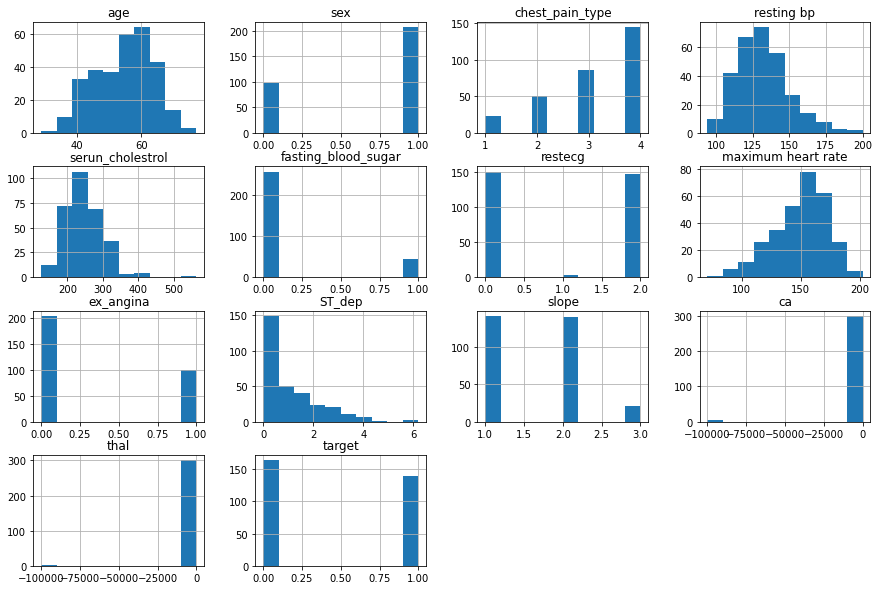

In [123]:

df.hist(figsize=(15,10))

### Most of the numerical data seems to be normall distributed

<AxesSubplot:xlabel='target', ylabel='count'>

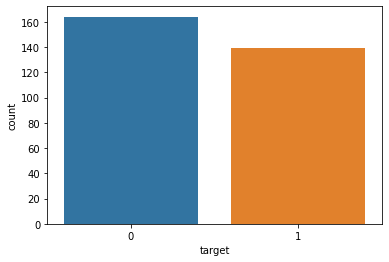

In [124]:
sns.countplot("target",data=df)

### By seeeing countplot  data looks  to be balanced 

### Feature Selection

<AxesSubplot:>

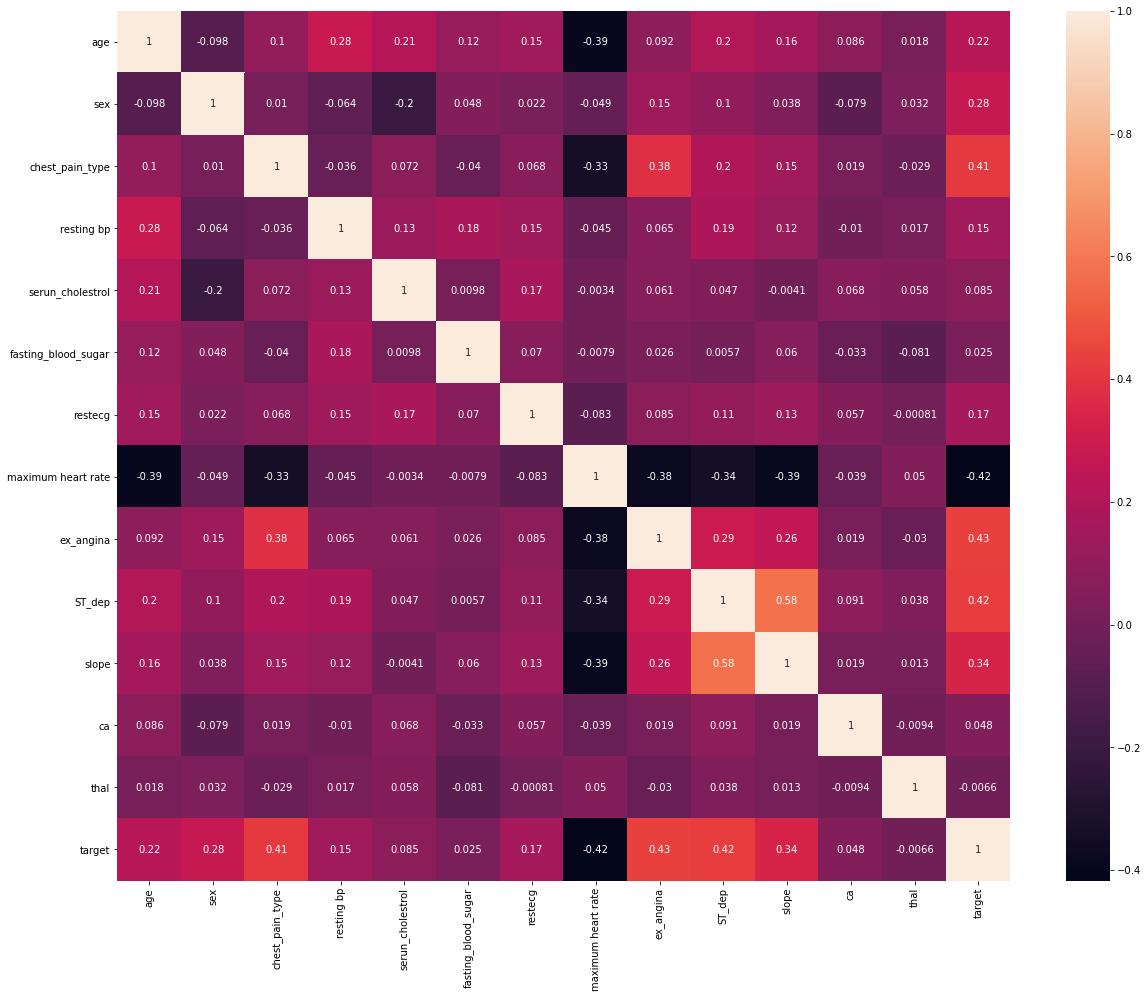

In [125]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(),annot=True)

### All feature seems to very less correlated with each other ##

### Breaking data into training and testing

In [5]:
X=df.iloc[:,:13]
Y=df.iloc[:,13:]
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=25,shuffle=True)

### Feature Scalling

In [6]:
from sklearn.preprocessing import StandardScaler
StandardScaler=StandardScaler()

#X_train
X_train[["age","resting bp","maximum heart rate","serun_cholestrol","ST_dep"]]=StandardScaler.fit_transform(X=X_train[["age","resting bp","maximum heart rate","serun_cholestrol","ST_dep"]])
X_train

,age,sex,chest_pain_type,resting bp,serun_cholestrol,fasting_blood_sugar,restecg,maximum heart rate,ex_angina,ST_dep,slope,ca,thal
1,1.356632,1,4,1.574388,0.801488,0,2,-1.888126,1,0.435360,2,3,3
142,-0.255340,1,2,-0.229438,-0.783697,1,0,1.492560,0,-0.905062,1,0,3
126,0.174519,0,4,3.829171,0.840629,1,2,-0.776058,1,2.669397,3,2,7
37,0.281984,1,4,1.010693,0.605786,0,2,-1.710195,1,-0.368893,2,1,6
275,1.034237,1,1,2.138084,-0.353153,0,2,0.202562,0,-0.368893,2,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,-0.362805,0,3,-0.680395,0.977620,0,2,0.291527,0,-0.368893,1,0,3
151,-1.329988,0,4,-1.695047,0.390514,0,2,-1.265368,0,-0.368893,2,0,3
255,-1.329988,0,3,-0.680395,-0.705416,0,0,1.003251,0,-0.905062,2,0,3
143,1.034237,1,3,-0.398547,1.251603,0,0,-0.865023,1,0.703445,2,0,7


### Logistic Regression

In [130]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
Logistic_model=model.fit(X_train,Y_train)
Y_pred=Logistic_model.predict(X_test)
#print("Accuracy on training",accuracy_score(X_train,Y_train))
print("Accuracy on testing",accuracy_score(Y_test,Y_pred))

Accuracy on testing 0.6065573770491803


In [ ]:
from sklearn.metrics  import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.59      0.74      0.66        31
           1       0.64      0.47      0.54        30

    accuracy                           0.61        61
   macro avg       0.61      0.60      0.60        61
weighted avg       0.61      0.61      0.60        61



### Random forest with Cross validation

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
cv=StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
model =RandomForestClassifier()
# evaluate model
scores = cross_val_score(model, X_train, Y_train, scoring=None, cv=cv, n_jobs=-1)
print(scores)

[0.68       0.84       0.79166667 0.91666667 0.70833333 0.91666667
 1.         0.83333333 0.75       0.70833333]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
#model=RandomForestClassifier(random_state=0,criterion='entropy', max_depth=5, max_features='log2',
                       #min_samples_leaf=4, n_estimators=50)
model=RandomForestClassifier(criterion='entropy', max_depth=11, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=4, n_estimators=25,
                       random_state=0)
model=model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
print("Accuracy on testing",accuracy_score(Y_test,Y_pred))

Accuracy on testing 0.8524590163934426


In [ ]:
from sklearn.metrics  import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84        31
           1       0.80      0.93      0.86        30

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(0,50,5)]
max_features=["auto","sqrt","log2"]
max_depth=[int(x) for x in np.linspace(0,50,10)]
min_samples_split=[2,3,4]
min_samples_leaf=[2,4,7,4]


In [ ]:
random_grid={"n_estimators":n_estimators,"max_features":max_features,"max_depth":max_depth,"min_samples_split":min_samples_split,"min_samples_leaf":min_samples_leaf,"criterion":["gini","entropy" ]}
print(random_grid)

rf_randomCV=RandomizedSearchCV(estimator=model,param_distributions=random_grid,n_iter=25,cv=cv,verbose=2,random_state=50,n_jobs=-1)
rf_randomCV.fit(X_train,Y_train)



{'n_estimators': [0, 12, 25, 37, 50], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [0, 5, 11, 16, 22, 27, 33, 38, 44, 50], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [2, 4, 7, 4], 'criterion': ['gini', 'entropy']}
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    9.5s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='entropy',
                                                    max_depth=11,
                                                    max_features='sqrt',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=4,
                                                    min_samples_spli...
                   ii

In [ ]:
rf_randomCV.best_estimator_



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=11, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### KNN with cross validation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_scores=[]
for k in range(0,25):
    model3=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(model3,X_train,Y_train,cv=cv)
    knn_scores.append(score.mean())
knn_scores

[nan,
 0.723,
 0.723,
 0.7683333333333333,
 0.7725,
 0.7686666666666666,
 0.7686666666666667,
 0.7686666666666666,
 0.7601666666666665,
 0.7685,
 0.777,
 0.8016666666666667,
 0.7933333333333333,
 0.7973333333333333,
 0.7975000000000001,
 0.7933333333333333,
 0.7891666666666668,
 0.7891666666666668,
 0.785,
 0.7891666666666667,
 0.7933333333333333,
 0.7891666666666667,
 0.7891666666666667,
 0.7808333333333334,
 0.7808333333333334]

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


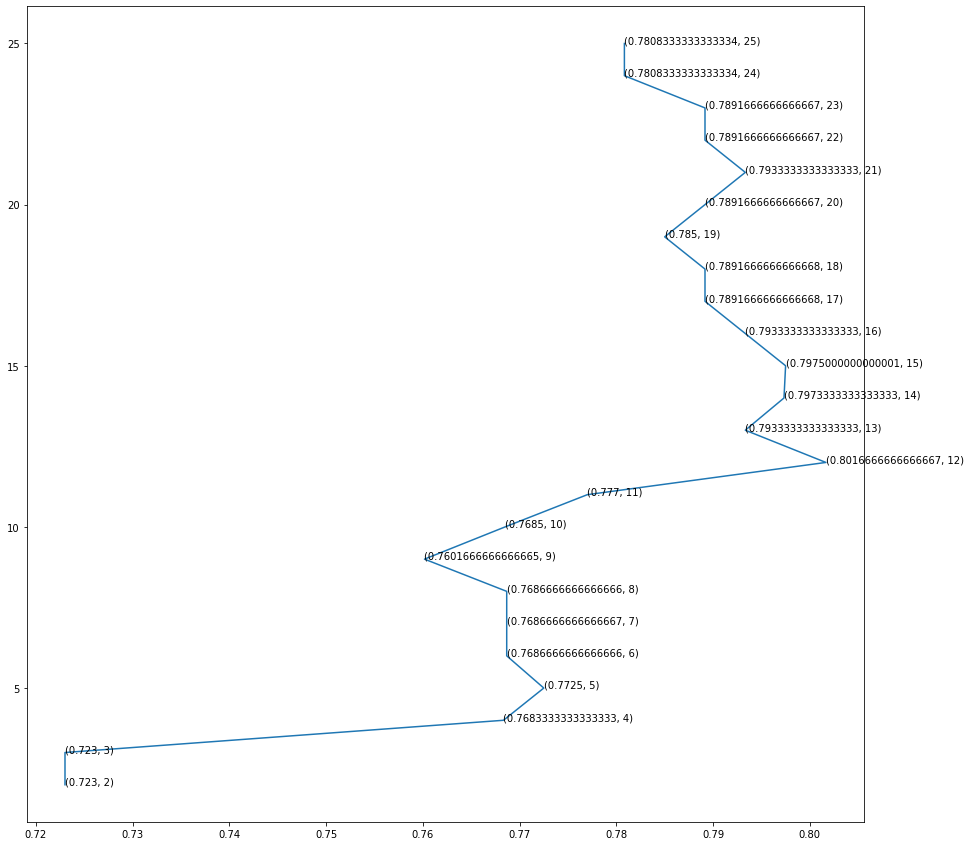

In [ ]:
k=[]
plt.figure(figsize=(15,15))
plt.plot(knn_scores,[i for i in range(1,26)])
for i in range(1,26):
    
    plt.text(knn_scores[i-1],i,(knn_scores[i-1],i))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model3=KNeighborsClassifier(n_neighbors=15).fit(X_train,Y_train)
Y_pred=model3.predict(X_test)

print("Accuracy on testing",accuracy_score(Y_test,Y_pred))

Accuracy on testing 0.7540983606557377


### Using ANN

In [10]:
!pip install keras-tuner

     |████████████████████████████████| 97 kB 3.2 MB/s 


In [10]:
#USING ANN
from tensorflow import keras
from tensorflow.keras import layers
import kerastuner
#import keras,kerastuner
from keras.models import Sequential
from keras.layers import Dense
#from keras.layers import LeakyReLU,PReLU,ELU,ReLU
from keras.layers import Dropout
from keras.optimizers import adam_v2
from kerastuner.tuners import RandomSearch

In [132]:
model=Sequential()

In [133]:

model.add(Dense(units=5,kernel_initializer="he_uniform",activation="elu",input_dim=13))

In [134]:

model.add(Dense(units=5,kernel_initializer="he_uniform",activation="elu"))


In [135]:

model.add(Dense(units=1,kernel_initializer="glorot_uniform",activation="sigmoid"))

In [136]:


model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [137]:
model_info=model.fit(X_train,Y_train,validation_split=.20,batch_size=8,epochs=100)


Epoch 1/100
25/25 [==============================] - 1s 15ms/step - loss: 184.1722 - accuracy: 0.5337 - val_loss: 0.9349 - val_accuracy: 0.5714
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 174.6186 - accuracy: 0.5337 - val_loss: 0.8583 - val_accuracy: 0.5714
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 162.2829 - accuracy: 0.5337 - val_loss: 0.7979 - val_accuracy: 0.5714
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 151.4397 - accuracy: 0.5389 - val_loss: 0.7610 - val_accuracy: 0.5714
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 142.2499 - accuracy: 0.5285 - val_loss: 0.7334 - val_accuracy: 0.5714
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 129.4034 - accuracy: 0.5233 - val_loss: 0.7138 - val_accuracy: 0.5714
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 120.6399 - accuracy: 0.5285 - val_loss: 0.7008 - val_accuracy: 0.571

In [138]:
print(model_info.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


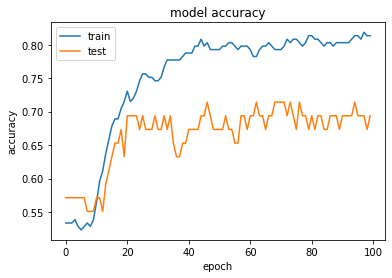

In [139]:
plt.plot(model_info.history["accuracy"])
plt.plot(model_info.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper left")

### Tuning

In [9]:

!pip install keras-tuner
from keras_tuner.tuners import RandomSearch

In [11]:
##KerasTuning
from kerastuner.tuners import RandomSearch
from tensorflow.keras import  layers
def build_model(hp):
    model =Sequential()
    for i in range(hp.Int('num_layers', 2, 30)):
        model.add(Dense(units=hp.Int('units_' + str(i),min_value=2,max_value=312,step=22),activation=hp.Choice('activation',values=['relu', 'tanh', 'sigmoid'],
                    default='relu'),kernel_initializer=hp.Choice("initilizer",values=["HeNormal","uniform","xavier"]) ) )
    model.add(Dense(1, activation='sigmoid'))
    #model.add(Dropout(hp.Float('dropout',min_value=0.0,max_value=0.1,default=0.005, step=0.01) ) )
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [12]:
tuner = RandomSearch(
    build_model,## Here this build_model is a hypermodel which is the first parameter of randomSearch it automatically pass a hp
    # parameter with a function call of build_model function
    objective='accuracy',
    max_trials=5,
    executions_per_trial=1)
    #directory='project',
    #project_name='Air Quality Index'))

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [13]:
tuner.search_space_summary()

Search space summary
Default search space size: 33
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 30, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 312, 'step': 22, 'sampling': None}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'sigmoid'], 'ordered': False}
initilizer (Choice)
{'default': 'HeNormal', 'conditions': [], 'values': ['HeNormal', 'uniform', 'xavier'], 'ordered': False}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 312, 'step': 22, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 312, 'step': 22, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 312, 'step': 22, 'sampling': None}
units_4 (Int)
{'default': Non

In [14]:
tuner.search(X_train, Y_train,
             epochs=10,
             validation_data=(X_test, Y_test))


Search: Running Trial #1

Hyperparameter    |Value             |Best Value So Far 
num_layers        |26                |5                 
units_0           |310               |90                
activation        |tanh              |relu              
initilizer        |xavier            |uniform           
units_1           |244               |112               
learning_rate     |0.01              |0.0001            
units_2           |244               |156               
units_3           |112               |24                
units_4           |24                |244               
units_5           |222               |112               
units_6           |156               |178               
units_7           |134               |244               
units_8           |288               |178               
units_9           |156               |200               
units_10          |222               |178               
units_11          |266               |24                
unit

Traceback (most recent call last):
  File "C:\Users\IQD DELL\anaconda3\lib\site-packages\keras_tuner\engine\hypermodel.py", line 127, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-11-6cca6547729f>", line 7, in build_model
    model.add(Dense(units=hp.Int('units_' + str(i),min_value=2,max_value=312,step=22),activation=hp.Choice('activation',values=['relu', 'tanh', 'sigmoid'],
  File "C:\Users\IQD DELL\anaconda3\lib\site-packages\keras\layers\core.py", line 1156, in __init__
    self.kernel_initializer = initializers.get(kernel_initializer)
  File "C:\Users\IQD DELL\anaconda3\lib\site-packages\keras\initializers\__init__.py", line 186, in get
    return deserialize(identifier)
  File "C:\Users\IQD DELL\anaconda3\lib\site-packages\keras\initializers\__init__.py", line 139, in deserialize
    return generic_utils.deserialize_keras_object(
  File "C:\Users\IQD DELL\anaconda3\lib\site-packages\keras\utils\generic_utils.py", line 704, in deserialize_keras_object
    ra

Invalid model 1/5
Invalid model 2/5


Traceback (most recent call last):
  File "C:\Users\IQD DELL\anaconda3\lib\site-packages\keras_tuner\engine\hypermodel.py", line 127, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-11-6cca6547729f>", line 7, in build_model
    model.add(Dense(units=hp.Int('units_' + str(i),min_value=2,max_value=312,step=22),activation=hp.Choice('activation',values=['relu', 'tanh', 'sigmoid'],
  File "C:\Users\IQD DELL\anaconda3\lib\site-packages\keras\layers\core.py", line 1156, in __init__
    self.kernel_initializer = initializers.get(kernel_initializer)
  File "C:\Users\IQD DELL\anaconda3\lib\site-packages\keras\initializers\__init__.py", line 186, in get
    return deserialize(identifier)
  File "C:\Users\IQD DELL\anaconda3\lib\site-packages\keras\initializers\__init__.py", line 139, in deserialize
    return generic_utils.deserialize_keras_object(
  File "C:\Users\IQD DELL\anaconda3\lib\site-packages\keras\utils\generic_utils.py", line 704, in deserialize_keras_object
    ra

Invalid model 3/5
Invalid model 4/5


Traceback (most recent call last):
  File "C:\Users\IQD DELL\anaconda3\lib\site-packages\keras_tuner\engine\hypermodel.py", line 127, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-11-6cca6547729f>", line 7, in build_model
    model.add(Dense(units=hp.Int('units_' + str(i),min_value=2,max_value=312,step=22),activation=hp.Choice('activation',values=['relu', 'tanh', 'sigmoid'],
  File "C:\Users\IQD DELL\anaconda3\lib\site-packages\keras\layers\core.py", line 1156, in __init__
    self.kernel_initializer = initializers.get(kernel_initializer)
  File "C:\Users\IQD DELL\anaconda3\lib\site-packages\keras\initializers\__init__.py", line 186, in get
    return deserialize(identifier)
  File "C:\Users\IQD DELL\anaconda3\lib\site-packages\keras\initializers\__init__.py", line 139, in deserialize
    return generic_utils.deserialize_keras_object(
  File "C:\Users\IQD DELL\anaconda3\lib\site-packages\keras\utils\generic_utils.py", line 704, in deserialize_keras_object
    ra

Invalid model 5/5


RuntimeError: Too many failed attempts to build model.

In [15]:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name='accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 5
units_0: 90
activation: relu
initilizer: uniform
units_1: 112
learning_rate: 0.0001
units_2: 156
units_3: 24
units_4: 244
units_5: 112
units_6: 178
units_7: 244
units_8: 178
units_9: 200
units_10: 178
units_11: 24
units_12: 112
units_13: 24
units_14: 24
units_15: 244
units_16: 24
units_17: 134
units_18: 134
units_19: 2
units_20: 156
units_21: 90
units_22: 178
units_23: 112
units_24: 178
units_25: 134
units_26: 46
units_27: 156
units_28: 24
Score: 0.9917355179786682
Trial summary
Hyperparameters:
num_layers: 29
units_0: 288
activation: relu
initilizer: HeNormal
units_1: 178
learning_rate: 0.001
units_2: 2
units_3: 2
units_4: 2
units_5: 2
units_6: 2
units_7: 2
units_8: 2
units_9: 2
units_10: 2
units_11: 2
units_12: 2
units_13: 2
units_14: 2
units_15: 2
units_16: 2
units_17: 2
units_18: 2
units_19: 2
units_20: 2
units_21: 2
units_22:

In [16]:
model_best=tuner.get_best_models()[0]

In [17]:
#best_hps=tuner.get_best_hyperparameters()[0]
#best_hps

In [18]:
#model = tuner.hypermodel.build(best_hps)
#model

In [19]:
#model = tuner.hypermodel.build(best_hps)
history = model_best.fit(X_train, Y_train, epochs=50, validation_data=(X_test,Y_test),initial_epoch=11)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) +1
print('Best epoch: %d' % (best_epoch))

Epoch 1/50
8/8 [==============================] - 3s 72ms/step - loss: 0.0371 - accuracy: 0.9917 - val_loss: 320.9342 - val_accuracy: 0.4918
Epoch 2/50
8/8 [==============================] - 0s 9ms/step - loss: 0.0370 - accuracy: 0.9917 - val_loss: 350.0997 - val_accuracy: 0.4918
Epoch 3/50
8/8 [==============================] - 0s 8ms/step - loss: 0.0576 - accuracy: 0.9835 - val_loss: 371.4890 - val_accuracy: 0.4918
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 0.1780 - accuracy: 0.9298 - val_loss: 298.3098 - val_accuracy: 0.4918
Epoch 5/50
8/8 [==============================] - 0s 6ms/step - loss: 0.0758 - accuracy: 0.9711 - val_loss: 318.0755 - val_accuracy: 0.4918
Epoch 6/50
8/8 [==============================] - 0s 7ms/step - loss: 0.0342 - accuracy: 0.9917 - val_loss: 347.0578 - val_accuracy: 0.4918
Epoch 7/50
8/8 [==============================] - 0s 7ms/step - loss: 0.0294 - accuracy: 0.9917 - val_loss: 376.8925 - val_accuracy: 0.4918
Epoch 8/50
8/8 [===

In [211]:
y_pred = model_best.predict(X_test)
y_pred = (y_pred > 0.5)

In [212]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test,y_pred)
cm


array([[31,  0],
       [30,  0]], dtype=int64)

In [213]:
accuracy_score(Y_test,y_pred)

0.5081967213114754

In [32]:
import keras
from keras.models import Sequential
from keras.layers import Activation, Dense

In [ ]:
#Other code of tuning

In [199]:
 def build( hp):
    model =Sequential()
    model.add(
        Dense(units=hp.Int('units', 8, 64, 4, default=8),activation=hp.Choice('activation',values=['relu', 'tanh', 'sigmoid'],
                    default='relu') ) )
    model.add(Dense(units=hp.Int('units', 16, 64, 4, default=16),activation=hp.Choice('activation',
                    values=['relu', 'tanh', 'sigmoid'],
                    default='relu') ) )
    model.add(Dropout(hp.Float('dropout',min_value=0.0,max_value=0.1,default=0.005, step=0.01) ) )
        
    model.add(Dense(1,activation="sigmoid"))
         # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'] )
    return model

In [200]:
tuner_rs = RandomSearch(
            build,
            objective='accuracy',
            seed=42,
            max_trials=10,
            executions_per_trial=2)

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [201]:
model_best_2=tuner_rs.get_best_models()[0]

In [202]:
history= model_best_2.fit(X_train,Y_train, epochs=50, validation_split=0.2)
val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) +1
print('Best epoch: %d' % (best_epoch))

Epoch 1/50


InvalidArgumentError:  Incompatible shapes: [8] vs. [480]
	 [[node RMSprop/RMSprop/update_3/add (defined at <ipython-input-202-f050a1d0561b>:1) ]] [Op:__inference_train_function_134275]

Function call stack:
train_function
